In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, KFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
uts = pd.read_csv(r'C:\Users\Lenovo\Documents\Tugas Kuliah\Sems 5\Mesin Learning\UTS\Dataset UTS_Gasal 2425.csv')
uts.head(10000)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,341,83,no,no,8,1960,4,4,1993,new,yes,2366,4016,229,yes,5,35371.3,Basic
9996,21514,5,no,yes,11,91373,1,1,1999,old,no,2584,5266,787,no,3,2153602.9,Basic
9997,1726,89,no,yes,5,73133,7,6,2009,old,yes,9311,1698,218,no,4,176425.9,Basic
9998,44403,29,yes,yes,12,34606,9,4,1990,old,yes,9061,1742,230,no,0,4448474.0,Basic


In [3]:
print("=" * 50)
print("Informasi DataFrame:")
print("=" * 50)
uts.info()
print("\n")

print("=" * 50)
print("Jumlah Nilai Kosong per Kolom:")
print("=" * 50)
print(uts.isnull().sum())
print("\n")

print("=" * 50)
print("Jumlah Total Baris Duplikat:")
print("=" * 50)
print(uts.duplicated().sum())
print("\n")

if uts.duplicated().sum() > 0:
    print("=" * 50)
    print("Detail Baris Duplikat:")
    print("=" * 50)
    print(uts[uts.duplicated()])
else:
    print("=" * 50)
    print("Tidak Ditemukan Baris Duplikat dalam DataFrame.")
    print("=" * 50)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasstorageroom     10000 non-null  object 
 15  hasguestroom       10000 non-null  int64  
 16  pr

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

uts.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.35840,50.27630,50225.48610,5.51010,5.52170,2005.48850,5033.10390,5028.01060,553.12120,4.99460,4993447.52575
std,28774.37535,28.81670,28.88917,29006.67580,2.87202,2.85667,9.30809,2876.72954,2894.33221,262.05017,3.17641,2877424.10995
min,89.00000,1.00000,1.00000,3.00000,1.00000,1.00000,1990.00000,0.00000,1.00000,100.00000,0.00000,10313.50000
25%,25098.50000,25.00000,25.00000,24693.75000,3.00000,3.00000,1997.00000,2559.75000,2512.00000,327.75000,2.00000,2516401.95000
50%,50105.50000,50.00000,50.00000,50693.00000,5.00000,5.00000,2005.50000,5092.50000,5045.00000,554.00000,5.00000,5016180.30000
75%,74609.75000,75.00000,76.00000,75683.25000,8.00000,8.00000,2014.00000,7511.25000,7540.50000,777.25000,8.00000,7469092.45000
max,99999.00000,100.00000,100.00000,99953.00000,10.00000,10.00000,2021.00000,10000.00000,10000.00000,1000.00000,10.00000,10006771.20000


In [5]:
df_properti = uts.copy()
df_properti.head()
df_properti.columns

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price', 'category'],
      dtype='object')

In [6]:
X = df_properti.drop(columns=['price', 'category'], axis=1)
y = df_properti['category']

X_train_bf, X_test, y_train_bf, y_test = train_test_split(X, y, test_size=0.30, random_state=95)
print(f"Shape of X_train: {X_train_bf.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (7000, 16)
Shape of X_test: (3000, 16)


In [7]:
print(X.columns)

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom'],
      dtype='object')


Kolom hasyard:

yes: 5087
no: 4913
Tidak seimbang secara signifikan, tetapi perbedaannya cukup kecil (5087 vs. 4913), sehingga bisa dianggap cukup seimbang.
Kolom haspool:

no: 5032
yes: 4968
Sama seperti hasyard, ini juga cukup seimbang.
Kolom isnewbuilt:

old: 5009
new: 4991
Sangat seimbang.
Kolom hasstorageroom:

yes: 5030
no: 4970
Seimbang.
Kolom category:

Basic: 4344
Luxury: 3065
Middle: 2591
Ini menunjukkan sedikit ketidakseimbangan. Kategori Basic memiliki jumlah yang jauh lebih banyak dibandingkan Luxury dan Middle. Dalam kasus klasifikasi, ini mungkin bisa menyebabkan ketidakseimbangan performa model, terutama jika model lebih cenderung ke kelas yang lebih dominan.
Kolom hasguestroom:

Distribusi lebih terpecah dengan jumlah di setiap kategori tidak jauh berbeda. Ini cukup seimbang.
Kesimpulan:
Kolom category menunjukkan ketidakseimbangan yang lebih jelas di antara kelas-kelas yang ada. Kategori Basic memiliki lebih banyak data dibandingkan Luxury dan Middle, yang bisa menyebabkan bias dalam model klasifikasi.
Kolom seperti hasyard, haspool, dan isnewbuilt menunjukkan distribusi yang cukup seimbang.

In [8]:
cat_cols=['hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

X_train_enc = transformer.fit_transform(X_train_bf)
X_test_enc = transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())
np.set_printoptions(formatter={'float': '{:.2f}'.format})

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,87.00000,74.00000,94427.00000,3.00000,6.00000,2002.00000,9076.00000,8573.00000,860.00000,1.00000
1,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,...,12.00000,4.00000,76222.00000,2.00000,3.00000,2009.00000,1987.00000,8788.00000,443.00000,0.00000
2,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,47.00000,84.00000,2192.00000,7.00000,9.00000,2006.00000,5620.00000,7860.00000,554.00000,4.00000
3,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,86.00000,68.00000,42101.00000,8.00000,6.00000,2005.00000,6355.00000,5668.00000,743.00000,3.00000
4,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,92.00000,8.00000,95468.00000,5.00000,7.00000,2002.00000,9655.00000,5678.00000,840.00000,2.00000
5,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,41.00000,98.00000,51712.00000,4.00000,1.00000,2004.00000,6907.00000,6416.00000,871.00000,0.00000
6,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,...,33.00000,32.00000,48601.00000,9.00000,1.00000,2012.00000,6833.00000,9708.00000,694.00000,3.00000
7,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,54.00000,10.00000,89174.00000,7.00000,10.00000,1999.00000,8930.00000,4203.00000,871.00000,8.00000
8,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,...,4.00000,3.00000,63144.00000,8.00000,2.00000,2002.00000,4238.00000,7147.00000,140.00000,8.00000
9,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,17.00000,24.00000,1451.00000,2.00000,1.00000,1995.00000,919.00000,6775.00000,862.00000,10.00000


In [9]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

X_folds = []
y_folds = []

for train_index, test_index in skf.split(X_train_enc, y_train_bf):
    X_folds.append((X_train_enc[train_index], X_train_enc[test_index]))
    y_folds.append((y_train_bf.iloc[train_index], y_train_bf.iloc[test_index]))

**Gradient Boosting Classifier**

In [10]:
pipe_GBC = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectKBest()),
    ('clf', GradientBoostingClassifier(random_state=95))
])

param_grid_GBC = {
    'feat_select__k': np.arange(2, 5),
    'clf__n_estimators': [100, 150],
    'clf__learning_rate': [0.01, 0.1, 1]
}

GSCV_GBC = GridSearchCV(pipe_GBC, param_grid_GBC, cv=StratifiedKFold(n_splits=5))
GSCV_GBC.fit(X_train_enc, y_train_bf)

mask = GSCV_GBC.best_estimator_.named_steps['feat_select'].get_support()
selected_features = df_train_enc.columns[mask]

print("Best model: {}".format(GSCV_GBC.best_estimator_))
print("Selected features: {}".format(selected_features))
print("Best CV score: {:.2f}".format(GSCV_GBC.best_score_))
print("Test set score: {:.2f}".format(GSCV_GBC.score(X_test_enc, y_test)))


Best model: Pipeline(steps=[('scale', MinMaxScaler()), ('feat_select', SelectKBest(k=4)),
                ('clf',
                 GradientBoostingClassifier(learning_rate=1, random_state=95))])
Selected features: Index(['onehotencoder__hasyard_yes', 'onehotencoder__haspool_no',
       'onehotencoder__haspool_yes', 'remainder__squaremeters'],
      dtype='object')
Best CV score: 0.94
Test set score: 0.94


In [11]:
pipe_GBC = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectPercentile()),
    ('clf', GradientBoostingClassifier(random_state=95))
])

param_grid_GBC = {
    'feat_select__percentile': [10, 20, 30],
    'clf__n_estimators': [100, 150],
    'clf__learning_rate': [0.01, 0.1, 1]
}

GSCV_GBC2 = GridSearchCV(pipe_GBC, param_grid_GBC, cv=StratifiedKFold(n_splits=5))
GSCV_GBC2.fit(X_train_enc, y_train_bf)

mask = GSCV_GBC2.best_estimator_.named_steps['feat_select'].get_support()
selected_features = df_train_enc.columns[mask]

print("Best model: {}".format(GSCV_GBC2.best_estimator_))
print("Selected features: {}".format(selected_features))
print("Best CV score: {:.2f}".format(GSCV_GBC2.best_score_))
print("Test set score: {:.2f}".format(GSCV_GBC2.score(X_test_enc, y_test)))

Best model: Pipeline(steps=[('scale', MinMaxScaler()),
                ('feat_select', SelectPercentile(percentile=30)),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=150,
                                            random_state=95))])
Selected features: Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'remainder__squaremeters'],
      dtype='object')
Best CV score: 1.00
Test set score: 1.00


In [12]:
pipe_SVC = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feat_select', SelectKBest()),
    ('clf', SVC())
])

param_grid_SVC = {
    'feat_select__k': np.arange(2, 5),
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

GSCV_SVC = GridSearchCV(pipe_SVC, param_grid_SVC, cv=StratifiedKFold(n_splits=5))
GSCV_SVC.fit(X_train_enc, y_train_bf)

mask = GSCV_SVC.best_estimator_.named_steps['feat_select'].get_support()
selected_features = df_train_enc.columns[mask]

print("Best model: {}".format(GSCV_SVC.best_estimator_))
print("Selected features: {}".format(selected_features))
print("Best CV score: {:.2f}".format(GSCV_SVC.best_score_))
print("Test set score: {:.2f}".format(GSCV_SVC.score(X_test_enc, y_test)))

Best model: Pipeline(steps=[('scale', StandardScaler()), ('feat_select', SelectKBest(k=2)),
                ('clf', SVC(C=10))])
Selected features: Index(['onehotencoder__haspool_yes', 'remainder__squaremeters'], dtype='object')
Best CV score: 0.93
Test set score: 0.94


In [13]:
pipe_SVC = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feat_select', SelectPercentile()),
    ('clf', SVC())
])

param_grid_SVC = {
    'feat_select__percentile': [10, 20, 30],
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

GSCV_SVC2 = GridSearchCV(pipe_SVC, param_grid_SVC, cv=StratifiedKFold(n_splits=5))
GSCV_SVC2.fit(X_train_enc, y_train_bf)

mask = GSCV_SVC2.best_estimator_.named_steps['feat_select'].get_support()
selected_features = df_train_enc.columns[mask]

print("Best model: {}".format(GSCV_SVC2.best_estimator_))
print("Selected features: {}".format(selected_features))
print("Best CV score: {:.2f}".format(GSCV_SVC2.best_score_))
print("Test set score: {:.2f}".format(GSCV_SVC2.score(X_test_enc, y_test)))


Best model: Pipeline(steps=[('scale', MinMaxScaler()),
                ('feat_select', SelectPercentile(percentile=30)),
                ('clf', SVC(C=10))])
Selected features: Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'remainder__squaremeters'],
      dtype='object')
Best CV score: 0.99
Test set score: 0.99


**Evaluasi**

Classification Report GradientBoosting SelectKBest:
              precision    recall  f1-score   support

       Basic       0.92      0.94      0.93      1304
      Luxury       1.00      1.00      1.00       921
      Middle       0.90      0.87      0.88       775

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



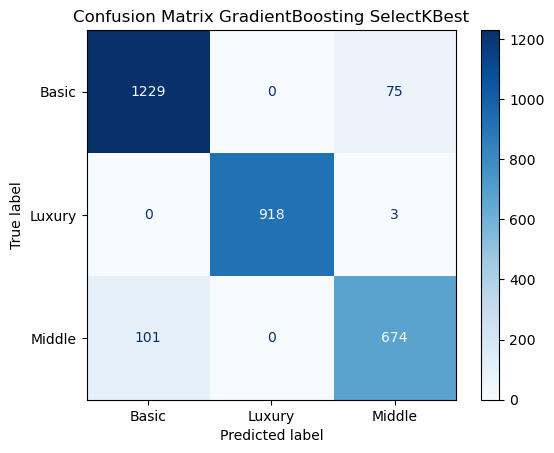

In [14]:
y_pred_GBC = GSCV_GBC.predict(X_test_enc)

print("Classification Report GradientBoosting SelectKBest:")
print(classification_report(y_test, y_pred_GBC))

cm_GBC = confusion_matrix(y_test, y_pred_GBC)
ConfusionMatrixDisplay(cm_GBC, display_labels=GSCV_GBC.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix GradientBoosting SelectKBest")
plt.show()

Classification Report GradientBoosting SelectPercentile:
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1304
      Luxury       1.00      1.00      1.00       921
      Middle       1.00      1.00      1.00       775

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



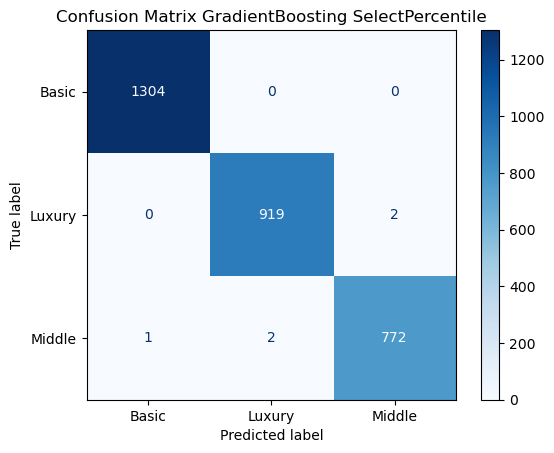

In [15]:
y_pred_GBC2 = GSCV_GBC2.predict(X_test_enc)

print("Classification Report GradientBoosting SelectPercentile:")
print(classification_report(y_test, y_pred_GBC2))

cm_GBC2 = confusion_matrix(y_test, y_pred_GBC2)
ConfusionMatrixDisplay(cm_GBC2, display_labels=GSCV_GBC2.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix GradientBoosting SelectPercentile")
plt.show()

Classification Report SVC SelectKBest:
              precision    recall  f1-score   support

       Basic       0.88      0.99      0.93      1304
      Luxury       1.00      1.00      1.00       921
      Middle       0.97      0.77      0.86       775

    accuracy                           0.94      3000
   macro avg       0.95      0.92      0.93      3000
weighted avg       0.94      0.94      0.93      3000



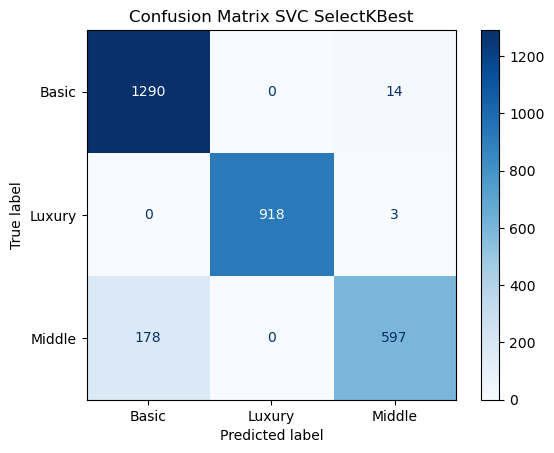

In [16]:
y_pred_SVC = GSCV_SVC.predict(X_test_enc)

print("Classification Report SVC SelectKBest:")
print(classification_report(y_test, y_pred_SVC))

cm_SVC = confusion_matrix(y_test, y_pred_SVC)
ConfusionMatrixDisplay(cm_SVC, display_labels=GSCV_SVC.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix SVC SelectKBest")
plt.show()

Classification Report SVC SelectPercentile:
              precision    recall  f1-score   support

       Basic       0.99      0.99      0.99      1304
      Luxury       0.99      1.00      1.00       921
      Middle       0.99      0.98      0.98       775

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



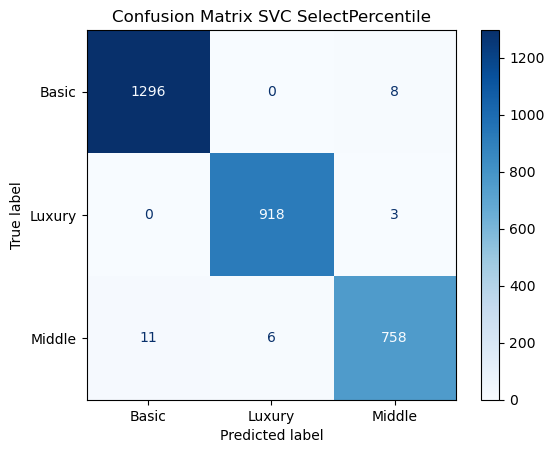

In [17]:
y_pred_SVC2 = GSCV_SVC2.predict(X_test_enc)

print("Classification Report SVC SelectPercentile:")
print(classification_report(y_test, y_pred_SVC2))

cm_SVC2 = confusion_matrix(y_test, y_pred_SVC2)
ConfusionMatrixDisplay(cm_SVC2, display_labels=GSCV_SVC2.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix SVC SelectPercentile")
plt.show()

### 1. **Cross-Validation Score (CV Score)**
   - **Gradient Boosting Classifier (SelectKBest):** 0.94
   - **Gradient Boosting Classifier (SelectPercentile):** 1.00
   - **SVC (SelectKBest):** 0.93
   - **SVC (SelectPercentile):** 0.99

   **Penjelasan:** CV Score menunjukkan performa rata-rata model pada beberapa subset data selama proses pelatihan. **Gradient Boosting Classifier** dengan metode **SelectPercentile** memiliki CV Score tertinggi (1.00), diikuti oleh **SVC** dengan **SelectPercentile** (0.99). Ini menunjukkan bahwa kedua model ini memiliki kestabilan dan akurasi yang sangat baik di berbagai subset data, tetapi **Gradient Boosting** unggul sedikit lebih baik.

### 2. **Test Score**
   - **Gradient Boosting Classifier (SelectKBest):** 0.94
   - **Gradient Boosting Classifier (SelectPercentile):** 1.00
   - **SVC (SelectKBest):** 0.94
   - **SVC (SelectPercentile):** 0.99

   **Penjelasan:** Test Score mengukur akurasi model pada data uji yang tidak pernah dilihat oleh model selama pelatihan. **Gradient Boosting Classifier** dengan **SelectPercentile** memiliki Test Score tertinggi (1.00), yang menunjukkan bahwa model ini mampu memprediksi kelas pada data uji dengan akurasi sempurna. **SVC** dengan **SelectPercentile** juga menunjukkan performa yang sangat baik dengan Test Score 0.99.

### 3. **Classification Report**
   - **Gradient Boosting Classifier (SelectKBest):**
     - Precision, recall, dan f1-score untuk kelas **Basic**: 0.92, 0.94, 0.93.
     - Untuk kelas **Luxury**: 1.00, 1.00, 1.00.
     - Untuk kelas **Middle**: 0.90, 0.87, 0.88.
   
   - **Gradient Boosting Classifier (SelectPercentile):**
     - Precision, recall, dan f1-score semuanya **1.00** untuk ketiga kelas (Basic, Luxury, Middle).
   
   - **SVC (SelectKBest):**
     - Precision, recall, dan f1-score untuk kelas **Basic**: 0.88, 0.99, 0.93.
     - Untuk kelas **Luxury**: 1.00, 1.00, 1.00.
     - Untuk kelas **Middle**: 0.97, 0.77, 0.86.
   
   - **SVC (SelectPercentile):**
     - Precision, recall, dan f1-score semuanya **0.99** untuk kelas **Basic**, **Luxury**, dan **Middle**.

   **Penjelasan:**
   - **Gradient Boosting Classifier** dengan **SelectPercentile** menunjukkan prediksi sempurna (1.00) untuk semua kelas, yang berarti tidak ada kesalahan klasifikasi pada data yang diuji.
   - Sebaliknya, **Gradient Boosting Classifier** dengan **SelectKBest** menunjukkan hasil yang baik tetapi tidak sebaik yang dengan **SelectPercentile**, terutama untuk kelas **Basic** dan **Middle**.
   - **SVC** juga menunjukkan performa yang sangat baik, terutama dengan **SelectPercentile** yang hampir sempurna di semua metrik, meskipun ada sedikit penurunan pada recall di kelas **Middle** dengan **SelectKBest**.

### 4. **Akurasi Keseluruhan**
   - **Gradient Boosting Classifier (SelectKBest):** 94%
   - **Gradient Boosting Classifier (SelectPercentile):** 100%
   - **SVC (SelectKBest):** 94%
   - **SVC (SelectPercentile):** 99%

   **Penjelasan:** **Gradient Boosting Classifier** dengan **SelectPercentile** memiliki akurasi keseluruhan yang sempurna (100%). Sementara itu, **SVC** dengan **SelectPercentile** juga menunjukkan hasil yang sangat baik (99%). Namun, hasil **SelectKBest** untuk kedua model menunjukkan akurasi yang lebih rendah (94%).

### 5. **Kesimpulan**
Berdasarkan hasil evaluasi, **Gradient Boosting Classifier** dengan **SelectPercentile** adalah model terbaik untuk klasifikasi ini, karena memiliki:
- **CV Score** dan **Test Score** yang sempurna (1.00), menunjukkan kestabilan dan akurasi yang luar biasa.
- **Classification report** yang menunjukkan prediksi sempurna di semua kelas.
- **Akurasi keseluruhan** yang mencapai 100%.

Oleh karena itu, **Gradient Boosting Classifier** dengan **SelectPercentile** adalah model yang paling direkomendasikan untuk digunakan dalam klasifikasi, karena menunjukkan performa terbaik di semua metrik evaluasi.